In [121]:
%matplotlib notebook

#This is just the path to my computer's module directory
import sys
sys.path.append('/usr/local/lib/python2.7/dist-packages')

#Import networkx for graph stuff (based on matplotlib)
import networkx as nx
#Import matplotlib for any plotting
import matplotlib.pyplot as plt
#Import random for creating random numbers
import random
#import scipy and numpy for scientifc calculations, numerics, np.pi=3.141... etc
#import scipy
import numpy
import time
import pylab

#from matplotlib import animation

#from JSAnimation import IPython_display

#-----------------------------------------------------------------------------------------
#INPUT PARAMETERS


#Number of Nodes, Eges and possible Opinions in the system, can be modified
NNodes = 50
NEdges = 30
NOpinions = 7

#Probability for process1 = phi,  1-phi for process 2
phi = 0

#Time between animation steps
step_time = 0.04

#Number of Iterations for procedure
iter_process = 200

#------------------------------------------------------------------------------------------

#Function that initializes Graph
def init_Graph():
    #Create Random Graph
    G = nx.gnm_random_graph(NNodes, NEdges)

    #Assign opinions by random to Node
    for i in range(NNodes):
        G.node[i]["opinion"]= random.randint(0, NOpinions-1)
    
    #Return Graph as G
    return G
    

In [122]:
#Function that makes a single application of the first process described in the script on the graph:
#"get a new friend who has the same opinion"
#Removes a random connection of a rnd Node  and adds a connection from this node to a node with the same opinion
def process1():
    #Choose random Node
    curr_node = random.randint(0,NNodes-1)
    
    #Get Opinion of current Node
    curr_opinion = G.node[curr_node].get("opinion")
    
   #print("curr_node", curr_node, "degree", G.degree(curr_node), "curr_opinion", curr_opinion)
    
    #Cancel if no Neighbors!
    if G.degree(curr_node)== 0:
        return 
    
    #Choose rnd Neighbor
    chosen_neighbor = random.randint(0,G.degree(curr_node)-1)
    chosen_neighbor = list(G.neighbors(curr_node))[chosen_neighbor]
    
    #print("chosen_neighbor", chosen_neighbor)
    
    #Remove Edge between Current Node and neighbor
    old_edge = (curr_node, chosen_neighbor)
    G.remove_edge(*old_edge)

    #Choose rnd Node that has same opinion but is not yet connected
    #Get Nodes with same opinion
    Same_Opinion = [x for x,y in G.nodes(data=True) if y['opinion']==curr_opinion]
    
    #iterate through list
    for i in range(len(Same_Opinion)):
        #exclude: No more unconnected nodes with same opinion
        if len(Same_Opinion) == 0:
            break
        #print("Same Opinion", Same_Opinion)
        #pick random node with same opinion
        newNeighbor = random.choice(Same_Opinion)
        #if Node is already connected, delete node from list and continue
        if G.has_edge(curr_node, newNeighbor):
            Same_Opinion.remove('newNeighbor')
        #if not break
        else:
            break
    
    #Add Edge between current Node and newNeighbor
    new_edge = (curr_node, newNeighbor)
    G.add_edge(*new_edge)
    
    return

In [123]:
#Second process
#"changes opinions of friends"
#Picks Random Node, picks neighbour of random node, adapts neighbours' opinion
def process2():
    #Choose random Node
    curr_node = random.randint(0,NNodes-1)
    
    #Get Opinion of current Node
    curr_opinion = G.node[curr_node].get("opinion")
    
    #print("curr_node", curr_node, "degree", G.degree(curr_node), "curr_opinion", curr_opinion)
    
    #Cancel if no Neighbors!
    if G.degree(curr_node)== 0:
        return 
    
    #get neighbor of curr_node
    chosen_neighbor = random.randint(0,G.degree(curr_node)-1)
    chosen_neighbor = list(G.neighbors(curr_node))[chosen_neighbor]
    
    #set opinion of neighbor to opinion of curr node
    G.node[chosen_neighbor]["opinion"] = curr_opinion
    return

<IPython.core.display.Javascript object>


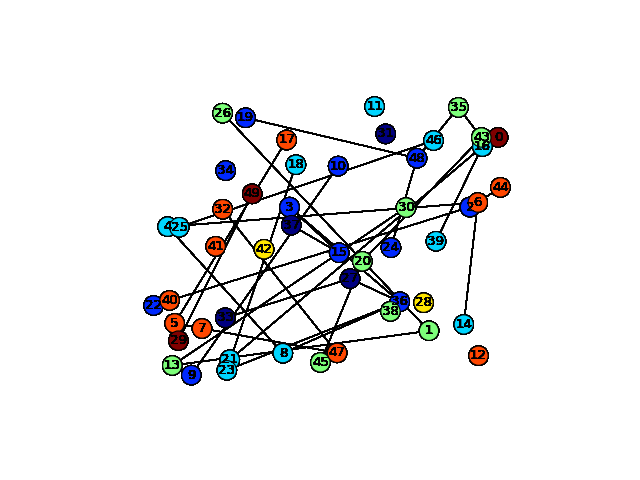

/usr/local/lib/python3.5/dist-packages/matplotlib/backend_bases.py:2437: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
process2
p

KeyboardInterrupt: 

In [124]:
pylab.ion()
G = init_Graph()
pos = nx.layout.random_layout(G)

def get_fig():
    nx.draw_networkx_edges(G, pos) 
    nx.draw_networkx_nodes(G, pos, node_color=list(nx.get_node_attributes(G,'opinion').values()))
    nx.draw_networkx_labels(G, pos=pos)
    #nx.draw(G)

pylab.show()

plt.axis('off')
get_fig()
pylab.draw()
time.sleep(step_time)
try:
    plt.pause(0.1)
except Exception:
    pass

for i in range(iter_process):
    if random.uniform(0, 1) < phi:
        process1()
        print("process1")
    else:
        process2()
        print("process2")
    get_fig()
    pylab.draw()
    time.sleep(step_time)
    try:
        plt.pause(0.1)
    except Exception:
        pass
    
